In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import mnist

In [3]:
(X_train,y_train), (X_test, y_test) = mnist.load_data("mnist.npz")

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

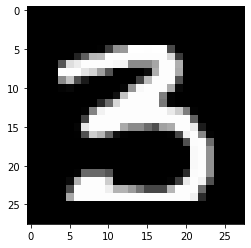

In [7]:
plt.imshow(X_train[875], cmap= 'gray')

In [8]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [13]:
y_test_cat.shape

(10000, 10)

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
y_train[5]

2

# Lets Create the Full CNN

In [16]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [17]:
K.clear_session()

In [18]:
model = Sequential()
model.add(Dense(512, input_dim = 28*28, activation = 'relu'))
model.add(Dense(256,activation = 'relu' ))
model.add(Dense(128,activation = 'relu' ))
model.add(Dense(32,activation = 'relu' ))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [19]:
h = model.fit(X_train,y_train_cat, batch_size= 128, epochs = 20, verbose = 1, validation_split= .25)

Epoch 1/20
352/352 [==============================] - 6s 15ms/step - loss: 9.0415 - accuracy: 0.2723 - val_loss: 2.0133 - val_accuracy: 0.2919
Epoch 2/20
352/352 [==============================] - 4s 12ms/step - loss: 1.9584 - accuracy: 0.2773 - val_loss: 1.8539 - val_accuracy: 0.2778
Epoch 3/20
352/352 [==============================] - 4s 12ms/step - loss: 1.8404 - accuracy: 0.2950 - val_loss: 1.7853 - val_accuracy: 0.3034
Epoch 4/20
352/352 [==============================] - 4s 13ms/step - loss: 1.8000 - accuracy: 0.3030 - val_loss: 1.7522 - val_accuracy: 0.3020
Epoch 5/20
352/352 [==============================] - 4s 12ms/step - loss: 1.6928 - accuracy: 0.3509 - val_loss: 1.5961 - val_accuracy: 0.3897
Epoch 6/20
352/352 [==============================] - 4s 11ms/step - loss: 1.5174 - accuracy: 0.4138 - val_loss: 1.1351 - val_accuracy: 0.5811
Epoch 7/20
352/352 [==============================] - 4s 11ms/step - loss: 1.1236 - accuracy: 0.5921 - val_loss: 1.1307 - val_accuracy: 0.6049

In [20]:
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'Epochs')

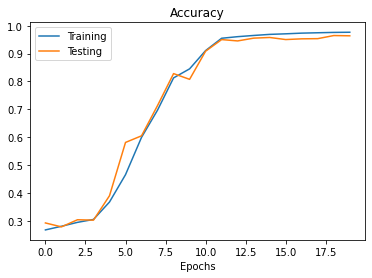

In [21]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

plt.legend(['Training', 'Testing'])

plt.title('Accuracy')
plt.xlabel('Epochs')

In [22]:
test_accuracy = model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.9652


In [23]:
test_accuracy[1]

0.9652000069618225

In [24]:
K.clear_session()

In [25]:
model = Sequential()
model.add(Dense(512, input_dim = 28*28, activation = 'relu'))
model.add(Dense(256,activation = 'relu' ))
model.add(Dense(128,activation = 'relu' ))
model.add(Dense(64,activation = 'relu' ))
model.add(Dense(32,activation = 'relu' ))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [26]:
h = model.fit(X_train,y_train_cat, batch_size= 128, epochs = 20, verbose = 1, validation_split= .25)

Epoch 1/20
352/352 [==============================] - 6s 13ms/step - loss: 7.1512 - accuracy: 0.6953 - val_loss: 0.2712 - val_accuracy: 0.9295
Epoch 2/20
352/352 [==============================] - 5s 15ms/step - loss: 0.2356 - accuracy: 0.9390 - val_loss: 0.2484 - val_accuracy: 0.9334
Epoch 3/20
352/352 [==============================] - 5s 15ms/step - loss: 0.1644 - accuracy: 0.9585 - val_loss: 0.2360 - val_accuracy: 0.9437
Epoch 4/20
352/352 [==============================] - 5s 14ms/step - loss: 0.1290 - accuracy: 0.9675 - val_loss: 0.2210 - val_accuracy: 0.9546
Epoch 5/20
352/352 [==============================] - 4s 12ms/step - loss: 0.1124 - accuracy: 0.9719 - val_loss: 0.1792 - val_accuracy: 0.9640
Epoch 6/20
352/352 [==============================] - 5s 13ms/step - loss: 0.0957 - accuracy: 0.9764 - val_loss: 0.2275 - val_accuracy: 0.9537
Epoch 7/20
352/352 [==============================] - 5s 14ms/step - loss: 0.0851 - accuracy: 0.9797 - val_loss: 0.1958 - val_accuracy: 0.9682

Text(0.5, 0, 'Epochs')

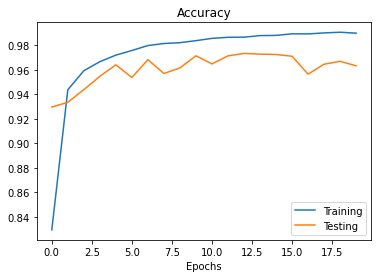

In [27]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

plt.legend(['Training', 'Testing'])

plt.title('Accuracy')
plt.xlabel('Epochs')

In [28]:
test_accuracy = model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.9627


In [29]:
test_accuracy[1]

0.9627000093460083

In [30]:
print(keras.__version__)

2.4.3
